# Ejercicio 2
## Ojos Digitales: Filtros y Bordes con OpenCV

Para este ejercicio, vamos a explorar técnicas básicas de procesamiento de imágenes utilizando OpenCV. Trabajaremos con conversión a escala de grises, aplicación de filtros (blur y sharpen) y detección de bordes (Sobel y Laplaciano).

Primero, necesitaremos instalar y cargar las bibliotecas necesarias:


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen
img = cv2.imread('lena.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Para visualización en matplotlib

In [2]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
img_blur = cv2.GaussianBlur(img_gray, (7, 7), 0)
# Sharpen con kernel
kernel_sharp = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
img_sharp = cv2.filter2D(img_gray, -1, kernel_sharp)

In [4]:
sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5)
laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)

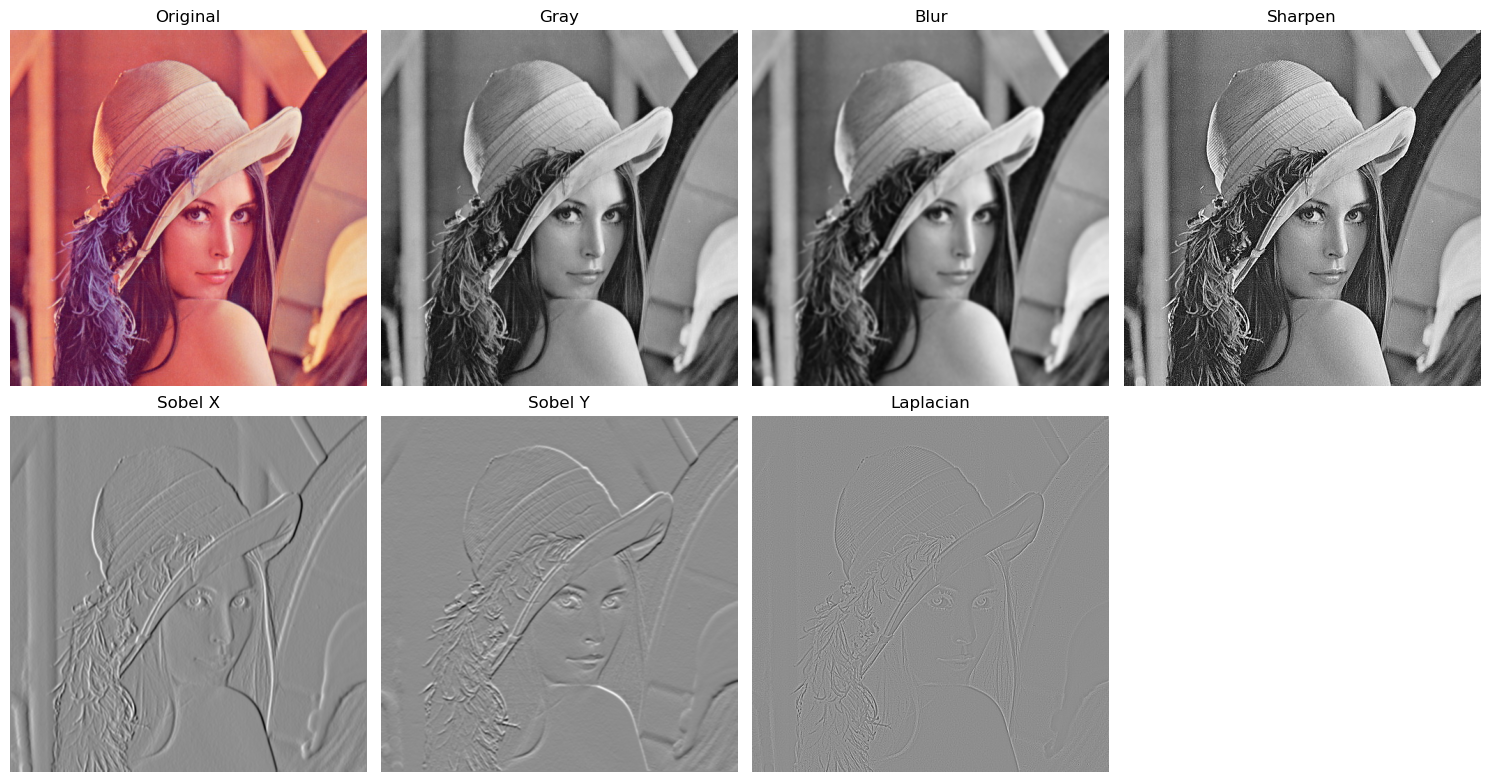

In [5]:
titles = ['Original', 'Gray', 'Blur', 'Sharpen', 'Sobel X', 'Sobel Y', 'Laplacian']
images = [img_rgb, img_gray, img_blur, img_sharp, sobelx, sobely, laplacian]

plt.figure(figsize=(15,8))
for i in range(7):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i], cmap='gray' if i>0 else None)
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [7]:
import cv2
import numpy as np

def nothing(x):
    pass

def resize_img(img, size=(150, 150)):
    return cv2.resize(img, size, interpolation=cv2.INTER_AREA)

cap = cv2.VideoCapture(0)  # Webcam predeterminada

cv2.namedWindow('Filtros Demo')
cv2.resizeWindow('Filtros Demo', 200, 200)  # Prueba con diferentes tamaños

# Sliders con rangos pequeños para más control
cv2.createTrackbar('Blur', 'Filtros Demo', 1, 15, nothing)      # 1-15
cv2.createTrackbar('Sharpen', 'Filtros Demo', 0, 5, nothing)    # 0-5
cv2.createTrackbar('Sobel k', 'Filtros Demo', 1, 7, nothing)    # 1-7
cv2.createTrackbar('Lap k', 'Filtros Demo', 1, 7, nothing)      # 1-7

size = (150, 150)  # Tamaño pequeño para cada cuadro

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convertir a grises
    img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Leer valores de sliders
    blur_k = cv2.getTrackbarPos('Blur', 'Filtros Demo') | 1            # Siempre impar
    sharp_i = cv2.getTrackbarPos('Sharpen', 'Filtros Demo')
    sobel_k = cv2.getTrackbarPos('Sobel k', 'Filtros Demo') | 1        # Siempre impar
    lap_k = cv2.getTrackbarPos('Lap k', 'Filtros Demo') | 1            # Siempre impar

    # Procesar Blur+Sharpen
    img_blur = cv2.GaussianBlur(img_gray, (blur_k, blur_k), 0)
    kernel_sharp = np.array([[0, -1, 0], [-1, 5 + sharp_i, -1], [0, -1, 0]])
    blur_sharpen = cv2.filter2D(img_blur, -1, kernel_sharp)
    blur_sharpen_resized = resize_img(blur_sharpen, size)

    # Aplica Sobel y Laplaciano sobre blur+sharpen
    sobelx = cv2.Sobel(blur_sharpen, cv2.CV_64F, 1, 0, ksize=sobel_k)
    sobely = cv2.Sobel(blur_sharpen, cv2.CV_64F, 0, 1, ksize=sobel_k)
    sobel_combined = cv2.convertScaleAbs(np.sqrt(sobelx**2 + sobely**2))
    sobel_combined = resize_img(sobel_combined, size)

    laplacian = cv2.convertScaleAbs(cv2.Laplacian(blur_sharpen, cv2.CV_64F, ksize=lap_k))
    laplacian = resize_img(laplacian, size)
    
    # Original (en gris, también redimensionada)
    original = resize_img(img_gray, size)

    # Crear grid 2x2
    top_row = np.hstack([original, blur_sharpen_resized])
    bottom_row = np.hstack([sobel_combined, laplacian])
    grid = np.vstack([top_row, bottom_row])

    cv2.imshow('Filtros Demo', grid)

    # Tecla 'q' para salir
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
